In [2]:
#Importing libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the clean dataframe
dataSharks = pd.read_csv ("../OUTPUT/sharks_clean.csv",encoding = "ISO-8859-1")
df = pd.DataFrame(dataSharks)
display(df.head())

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,Species
0,0,25-Jun-2018,2018,Uncertain,USA,California,"Oceanside, San Diego County",PADDLING,F,57,N,18h00,WHITE SHARK
1,1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",STANDING,F,11,N,14h00 -15h00,Unknown
2,2,09-Jun-2018,2018,Uncertain,USA,Hawaii,"Habush, Oahu",SURFING/WATERSPORTS,M,48,N,07h45,Unknown
3,3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURFING/WATERSPORTS,M,Unknown,N,Unknown,Unknown
4,4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,SWIMMING/DIVING,M,Unknown,N,Unknown,TIGER SHARK


### My Hypothesis:

1. Provoked attacks are proportionately more lethal than unprovoked ones
2. Most lethal attacks happen in New South Wales, Australia
3. The most lethal shark is the white shark
4. The most lethal activity for men is Swimming/Diving

### Hypothesis 1: Provoked attacks are proportionately more lethal than unprovoked ones

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,Species
1,1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",STANDING,F,11,N,14h00 -15h00,Unknown
3,3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURFING/WATERSPORTS,M,Unknown,N,Unknown,Unknown
4,4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,SWIMMING/DIVING,M,Unknown,N,Unknown,TIGER SHARK
5,5,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",SURFING/WATERSPORTS,M,Unknown,N,Unknown,Unknown
6,6,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",SWIMMING/DIVING,M,18,Y,Late afternoon,TIGER SHARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,6297,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,SWIMMING/DIVING,M,Unknown,Y,Unknown,Unknown
6281,6298,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Unknown,SWIMMING/DIVING,M,Unknown,Y,Unknown,Unknown
6282,6299,1900-1905,1900,Unprovoked,USA,North Carolina,Ocracoke Inlet,SWIMMING/DIVING,M,Unknown,Y,Unknown,Unknown
6283,6300,1883-1889,1883,Unprovoked,PANAMA,Unknown,"Panama Bay 8ÂºN, 79ÂºW",UNKNOWN,M,Unknown,Y,Unknown,Unknown


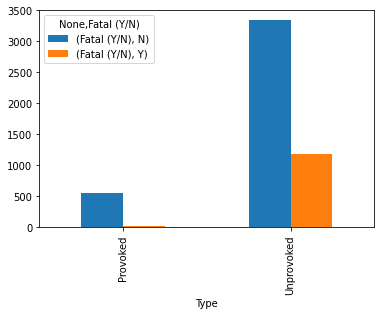

In [3]:
# Creating a temporary df without the uncertain category for "Type" and without the Unknown category for "Fatal"
df1=df[df["Type"] != 'Uncertain']
df1=df1[df1["Fatal (Y/N)"] != 'Unknown']

#Plotting to see the relation between "Type" and "Fatal"
df1.groupby(["Type","Fatal (Y/N)"]).agg({"Fatal (Y/N)": "count"}).unstack().plot.bar()
df1


We can see that my first hypothesis was wrong, and that unprovoked attacks are more deadly that provoked attacks. 

### Hypothesis 2: Most lethal attacks happen in New South Wales, Australia.

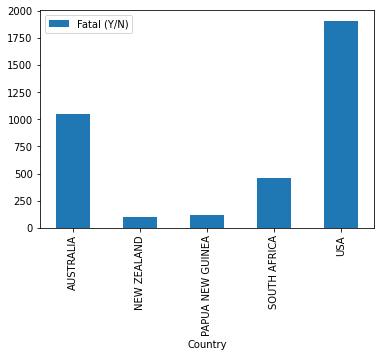

In [4]:
#filtering of the database keeping only the top5 countries cases.
top5=df1['Country'].value_counts()[0:5].index

#creation of a filter to consider only the all-value-known entries of the top 5 countries
filter1=(df1['Country'].isin(top5))
df3=df1[filter1]


df3.groupby(["Country"]).agg({'Fatal (Y/N)': "count"}).plot.bar()

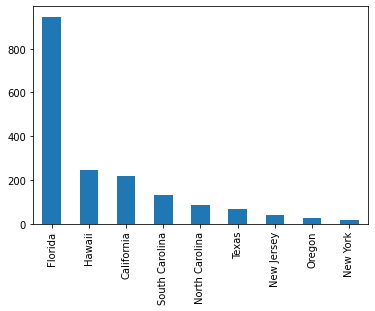

In [5]:
filter_1=(df['Country'].isin(['USA','AUSTRALIA']))
df3_1=df1[filter1]
df3_2=df3_1[df3_1['Country']=='AUSTRALIA']['Area'].value_counts().sort_values(ascending=False)
df3_3=df3_1[df3_1['Country']=='USA']['Area'].value_counts().sort_values(ascending=False)

#Plot of the USA areas
df3_3[df3_3.values > 15].plot.bar()

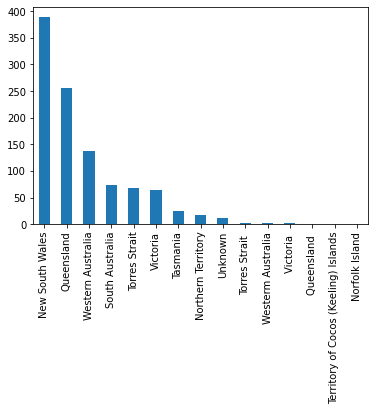

In [8]:
df3_2.plot.bar()

We can see that New South Wales (NSW) is not the most exposed area because Florida goes first but NSW closely follows behind.

### Hypothesis 3: The most lethal shark is the white shark.

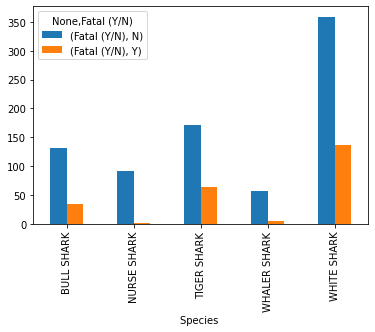

In [9]:
#I am considering only the top 5 most relevant species
top5s=df["Species "].value_counts()[1:6].index

df2=df1[df1["Species "].isin(top5s)]
df2.groupby(["Species ","Fatal (Y/N)"]).agg({"Fatal (Y/N)": "count"}).unstack().plot.bar()

In [10]:
df3=df2.groupby(["Species ","Fatal (Y/N)"]).agg({"Fatal (Y/N)": "count"})
df3

Fatal (Y/N)
Species      Fatal (Y/N)             
BULL SHARK   N                    131
             Y                     35
NURSE SHARK  N                     91
             Y                      1
TIGER SHARK  N                    172
             Y                     63
WHALER SHARK N                     57
             Y                      5
WHITE SHARK  N                    359
             Y                    136

We can see that my third hypothesis is correct and that the great white shark is the most deadly one of them all.

### Hypothesis 4: The most lethal activity for men is Swimming/Diving

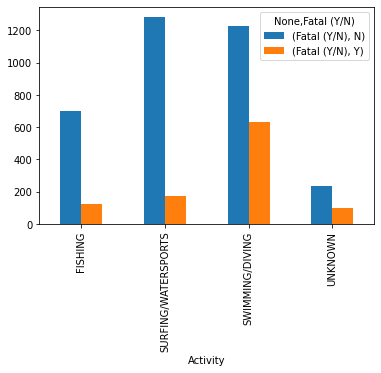

In [11]:
#I am considering only the top 4 most relevant activities
top4=df["Activity"].value_counts()[0:4].index

df4=df1[df1["Activity"].isin(top4)]
df4.groupby(["Activity","Fatal (Y/N)"]).agg({"Fatal (Y/N)": "count"}).unstack().plot.bar()

My last hypothesis is indeed correct. Most attacks happen to swimmers/snorkelers and scubba divers. This makes sense because contrary to surfers, swimmers and divers go further out the coast and are therefore more exposed to sharks.